In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [121]:
filename = 'NBAShot Locations1997-2020.csv'
df = pd.read_csv(filename)

In [123]:
length = len(df)
print(f"The dataframe has {length} rows.")


The dataframe has 4729512 rows.


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [125]:
df.shape

(4729512, 22)

In [126]:
df.tail()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
4729507,41800406,366,2738,Andre Iguodala,1610612744,Golden State Warriors,3,7,51,Pullup Jump shot,...,Right Side Center(RC),16-24 ft.,17,135,107,0,20190613,GSW,TOR,Playoffs
4729508,41800406,392,2738,Andre Iguodala,1610612744,Golden State Warriors,3,6,8,Jump Shot,...,Right Side(R),24+ ft.,23,228,37,1,20190613,GSW,TOR,Playoffs
4729509,41800406,404,2738,Andre Iguodala,1610612744,Golden State Warriors,3,4,41,Floating Jump shot,...,Center(C),Less Than 8 ft.,4,38,21,1,20190613,GSW,TOR,Playoffs
4729510,41800406,468,2738,Andre Iguodala,1610612744,Golden State Warriors,3,1,7,Jump Shot,...,Right Side Center(RC),24+ ft.,26,156,217,1,20190613,GSW,TOR,Playoffs
4729511,41800406,584,2738,Andre Iguodala,1610612744,Golden State Warriors,4,4,50,Pullup Jump shot,...,Right Side Center(RC),16-24 ft.,18,102,153,1,20190613,GSW,TOR,Playoffs


In [127]:
min_date = df['Game Date'].min()
max_date = df['Game Date'].max()
print(min_date)
print(max_date)

19971031
20200311


In [128]:
df = df.dropna()

In [129]:
teams = df['Team Name'].unique()
teams

array(['Washington Wizards', 'Utah Jazz', 'San Antonio Spurs',
       'Atlanta Hawks', 'Toronto Raptors', 'Portland Trail Blazers',
       'New York Knicks', 'Houston Rockets', 'Phoenix Suns', 'Miami Heat',
       'Cleveland Cavaliers', 'Milwaukee Bucks', 'Los Angeles Clippers',
       'Philadelphia 76ers', 'Denver Nuggets', 'Golden State Warriors',
       'Orlando Magic', 'Dallas Mavericks', 'Seattle SuperSonics',
       'Sacramento Kings', 'Los Angeles Lakers', 'Vancouver Grizzlies',
       'Charlotte Hornets', 'New Jersey Nets', 'Chicago Bulls',
       'Indiana Pacers', 'Boston Celtics', 'Detroit Pistons',
       'Minnesota Timberwolves', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers'],
      dtype=object)

In [130]:
df['Shot Made Flag'] = df['Shot Made Flag'].astype(int)

In [135]:
shot_types = df['Action Type'].unique()
shot_types

array(['Jump Shot', 'Layup', 'No Shot', 'Hook Shot'], dtype=object)

In [132]:
season_types = df['Season Type'].unique()
print(season_types)


['Regular Season' 'Playoffs']


In [133]:
shot_type_map = {
    'Jump Shot': 'Jump Shot',
    'Layup Shot': 'Layup',
    'Driving Layup Shot': 'Layup',
    'Tip Shot': 'No Shot',  # updated mapping for Tip Shot
    'Running Jump Shot': 'Jump Shot',
    'Slam Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Driving Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Hook Shot': 'Hook Shot',
    'No Shot': 'No Shot',
    'Turnaround Jump Shot': 'Jump Shot',
    'Reverse Layup Shot': 'Layup',
    'Running Layup Shot': 'Layup',
    'Driving Finger Roll Shot': 'Layup',
    'Alley Oop Dunk Shot': 'No Shot',  # updated mapping for Alley Oop Dunk Shot
    'Finger Roll Shot': 'Layup',
    'Reverse Dunk Shot': 'No Shot',  # updated mapping for Reverse Dunk Shot
    'Running Hook Shot': 'Hook Shot',
    'Running Dunk Shot': 'No Shot',  # updated mapping for Running Dunk Shot
    'Turnaround Hook Shot': 'Hook Shot',
    'Running Finger Roll Shot': 'Layup',
    'Driving Hook Shot': 'Hook Shot',
    'Running Tip Shot': 'No Shot',  # updated mapping for Running Tip Shot
    'Alley Oop Layup shot': 'Layup',
    'Turnaround Finger Roll Shot': 'Layup',
    'Fadeaway Jump Shot': 'Jump Shot',
    'Jump Hook Shot': 'Hook Shot',
    'Follow Up Dunk Shot': 'No Shot',  # updated mapping for Follow Up Dunk Shot
    'Jump Bank Shot': 'Jump Shot',
    'Hook Bank Shot': 'Hook Shot',
    'Driving Finger Roll Layup Shot': 'Layup',
    'Running Finger Roll Layup Shot': 'Layup',
    'Floating Jump shot': 'Jump Shot',
    'Putback Dunk Shot': 'No Shot',  # updated mapping for Putback Dunk Shot
    'Turnaround Fadeaway shot': 'Jump Shot',
    'Running Reverse Layup Shot': 'Layup',
    'Putback Layup Shot': 'Layup',
    'Finger Roll Layup Shot': 'Layup',
    'Driving Slam Dunk Shot': 'No Shot',  # updated mapping for Driving Slam Dunk Shot
    'Driving Reverse Layup Shot': 'Layup',
    'Pullup Jump shot': 'Jump Shot',
    'Running Bank shot': 'Jump Shot',
    'Step Back Jump shot': 'Jump Shot',
    'Driving Jump shot': 'Jump Shot',
    'Reverse Slam Dunk Shot': 'No Shot',  # updated mapping for Reverse Slam Dunk Shot
    'Driving Bank shot': 'Jump Shot',
    'Putback Slam Dunk Shot': 'No Shot',  # updated mapping for Putback Slam Dunk Shot
    'Driving Bank Hook Shot': 'Hook Shot',
    'Running Slam Dunk Shot': 'No Shot',  # updated mapping for Running Slam Dunk Shot
    'Turnaround Bank shot': 'Jump Shot',
    'Turnaround Bank Hook Shot': 'Hook Shot',
    'Jump Bank Hook Shot': 'Hook Shot',
    'Fadeaway Bank shot': 'Jump Shot',
    'Pullup Bank shot': 'Jump Shot',
    'Putback Reverse Dunk Shot': 'No Shot',
    'Running Bank Hook Shot': 'Hook Shot',
    'Tip Layup Shot': 'Layup',
    'Cutting Dunk Shot': 'No Shot',
    'Cutting Layup Shot': 'Layup',
    'Tip Dunk Shot': 'No Shot',
    'Running Alley Oop Dunk Shot': 'No Shot',
    'Running Alley Oop Layup Shot': 'Layup',
    'Driving Floating Jump Shot': 'Jump Shot',
    'Cutting Finger Roll Layup Shot': 'Layup',
    'Running Pull-Up Jump Shot': 'Jump Shot',
    'Driving Floating Bank Jump Shot' : 'Jump Shot', 
    'Step Back Bank Jump Shot': 'Jump Shot',
    'Turnaround Fadeaway Bank Jump Shot': 'Jump Shot', 
    'Driving Reverse Dunk Shot': 'Jump Shot',
    'Running Reverse Dunk Shot' : 'Jump Shot',
}

In [134]:
df['Action Type'] = df['Action Type'].map(shot_type_map)

In [140]:
df['Game Date'] = pd.to_datetime(df['Game Date'], format='%Y%m%d')
df['year'] = df['Game Date'].dt.year
df['month'] = df['Game Date'].dt.month
df['day'] = df['Game Date'].dt.day

Top 5 winning teams of all time.

Top 5 all time players

how team is winning based on which shot types ?

In [136]:
team_wins = df[df['Shot Made Flag'] == 1].groupby('Team Name')['Game ID'].nunique()
team_ranking = team_wins.sort_values(ascending=False)

print(team_ranking[:5])
print("")
player_team_shots_made = df.groupby(['Player Name', 'Team Name'])['Shot Made Flag'].sum().reset_index()
player_team_shots_made = player_team_shots_made.sort_values(by='Shot Made Flag', ascending=False)
print(player_team_shots_made.head(5))

Team Name
San Antonio Spurs     2103
Los Angeles Lakers    2037
Miami Heat            2017
Boston Celtics        2011
Indiana Pacers        1998
Name: Game ID, dtype: int64

        Player Name            Team Name  Shot Made Flag
3510    Kobe Bryant   Los Angeles Lakers           13534
1672  Dirk Nowitzki     Dallas Mavericks           12389
5576     Tim Duncan    San Antonio Spurs           12238
3659   LeBron James  Cleveland Cavaliers            9997
1795    Dwyane Wade           Miami Heat            9260


Player shooting trends: You could analyze how individual players' shooting performance has changed over time, by creating a line chart that shows their shooting percentage over the years. (based on shot types.)

In [144]:
def shooting_trends(player):
  player_data = df[df['Action Type'] != 'No Shot']
  player_shots = player_data.groupby(["year","Action Type"])["Shot Made Flag"].agg(["count", "sum"])
  player_shots["Shooting Percentage"] = player_shots["sum"] / player_shots["count"] * 100
  ax = player_shots["Shooting Percentage"].unstack().plot(kind="bar", figsize=(10, 6), linewidth=2, color=["purple","gray","pink"])

  ax.set_title("Player Shooting Trends: {}".format(player))
  ax.set_xlabel("Season")
  ax.set_ylabel("Shooting Percentage")

  ax.legend(loc="best")
  ax.grid(False)

  # Show the chart
  plt.show()
    


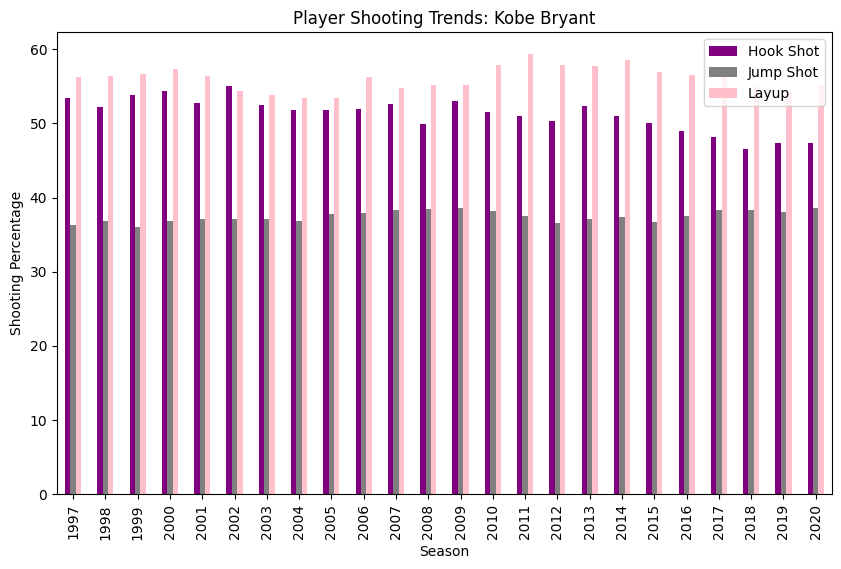

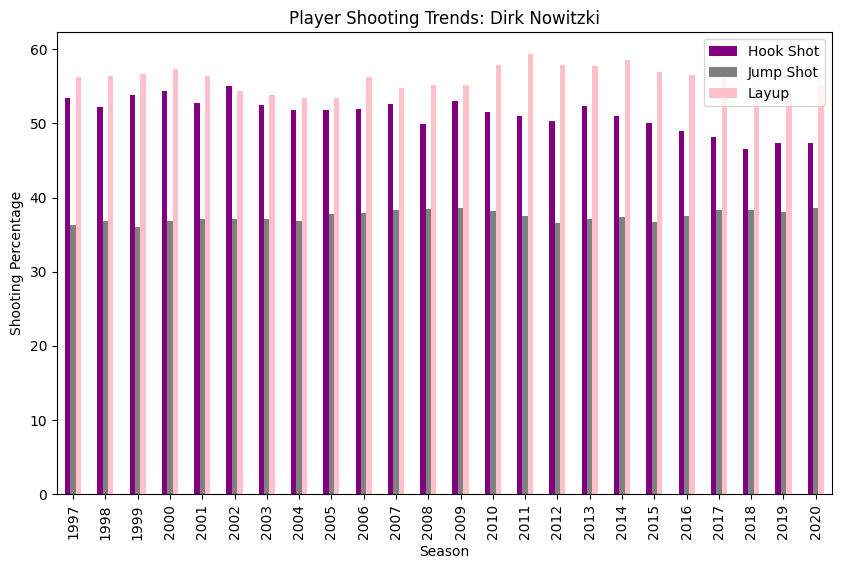

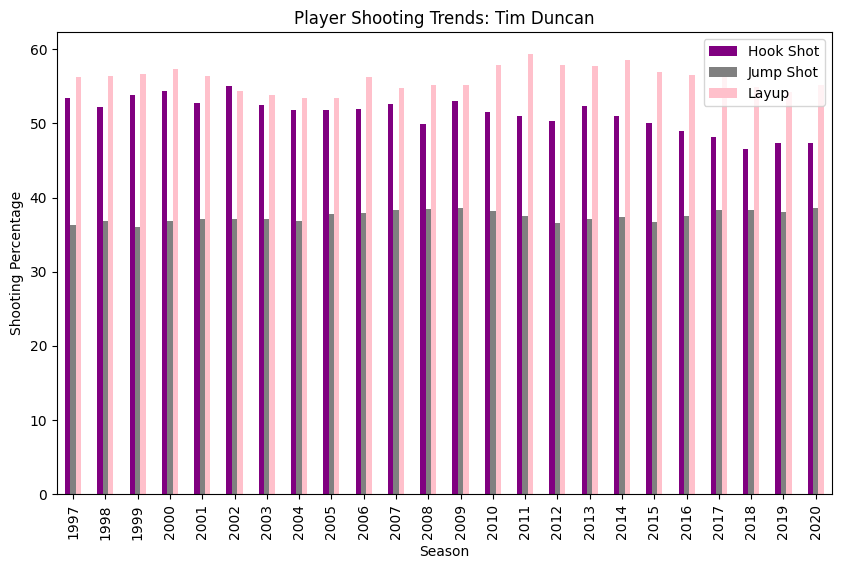

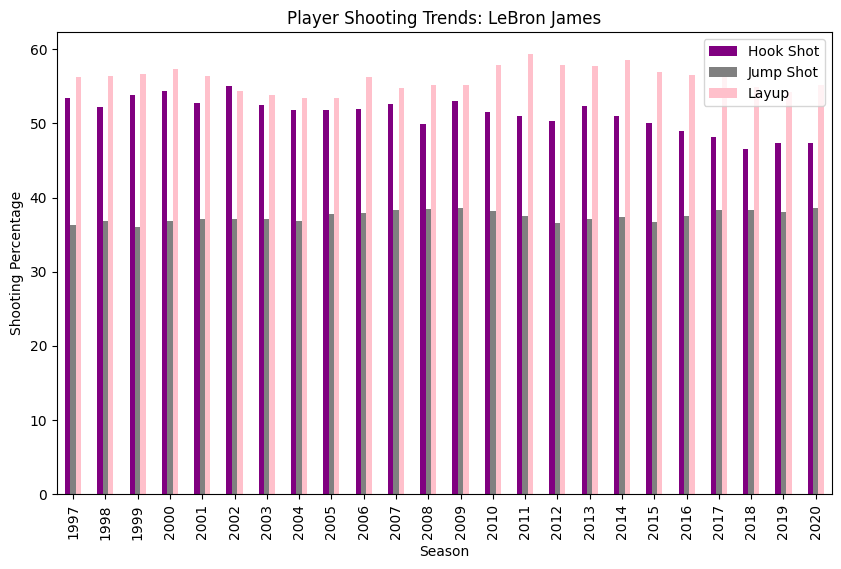

In [145]:
shooting_trends('Kobe Bryant')
shooting_trends('Dirk Nowitzki')
shooting_trends('Tim Duncan')
shooting_trends('LeBron James')

Shot selection by player: Analyze how different players choose their shots by creating a histogram of the different shot types (e.g. layup, dunk, jump shot, etc.) for each player. This could help identify player strengths and weaknesses.

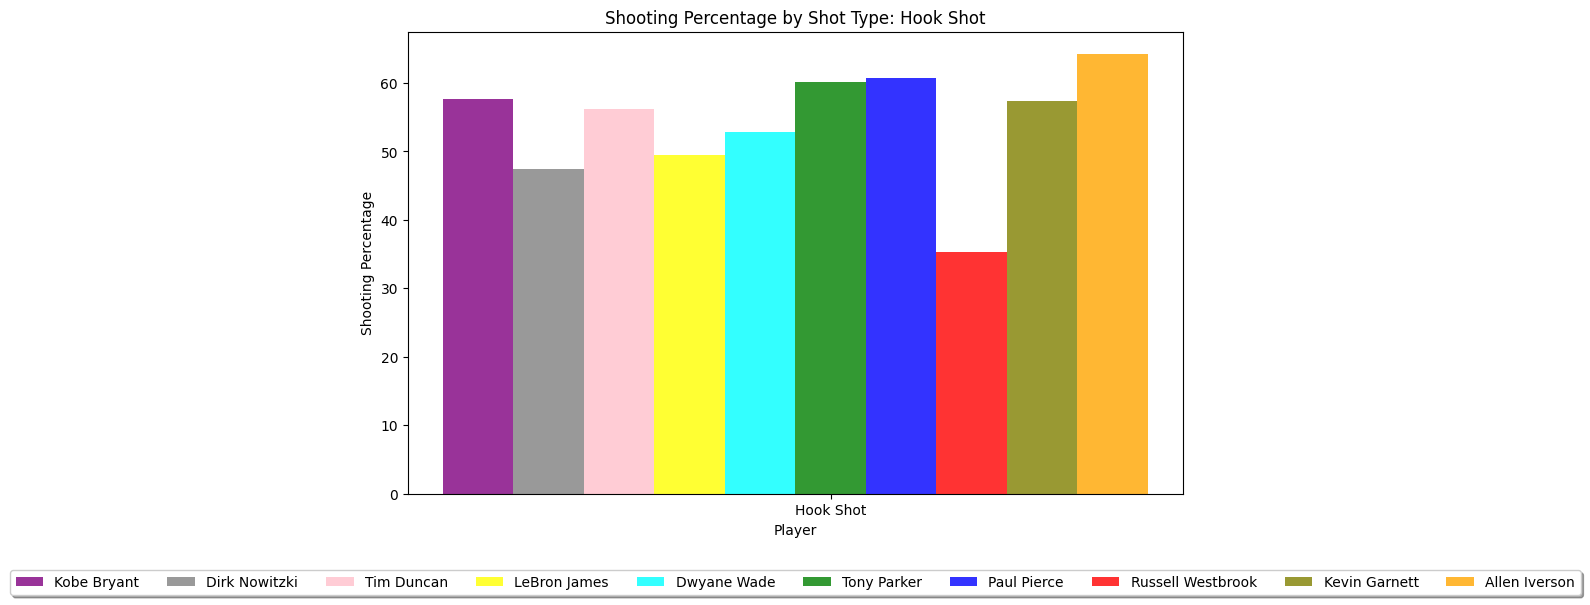

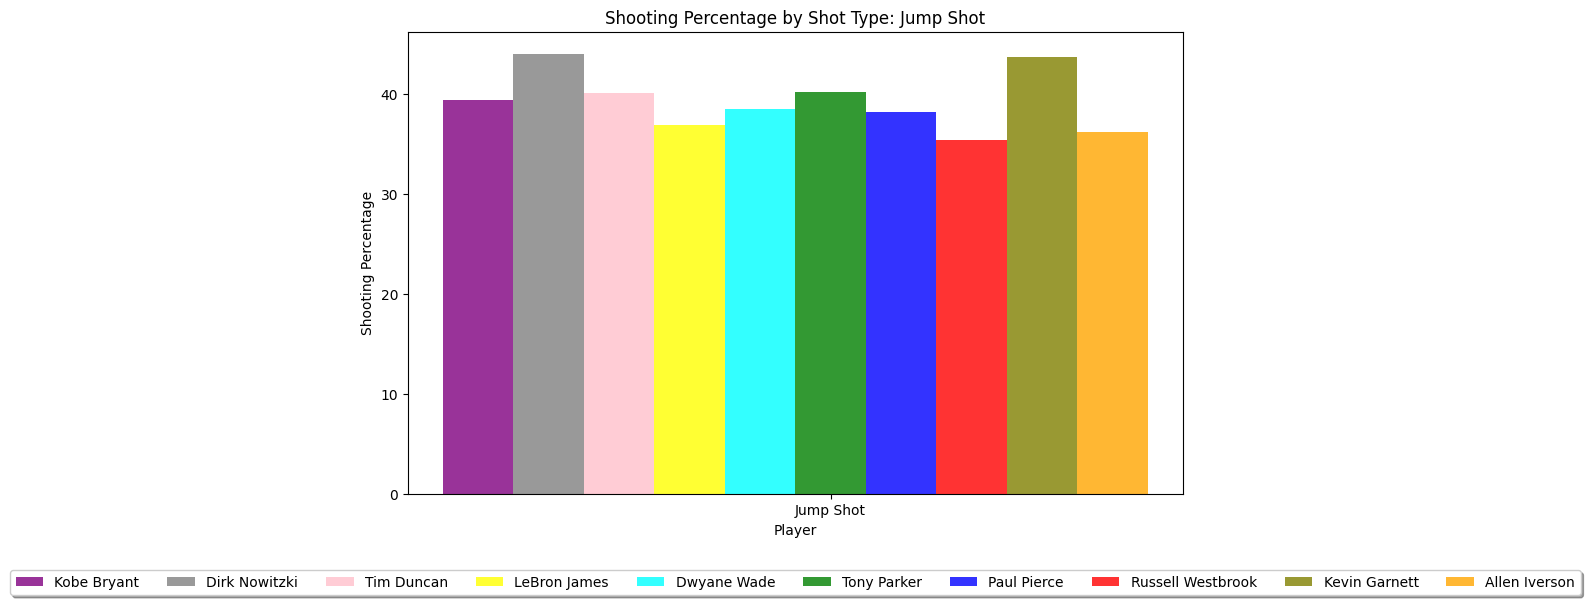

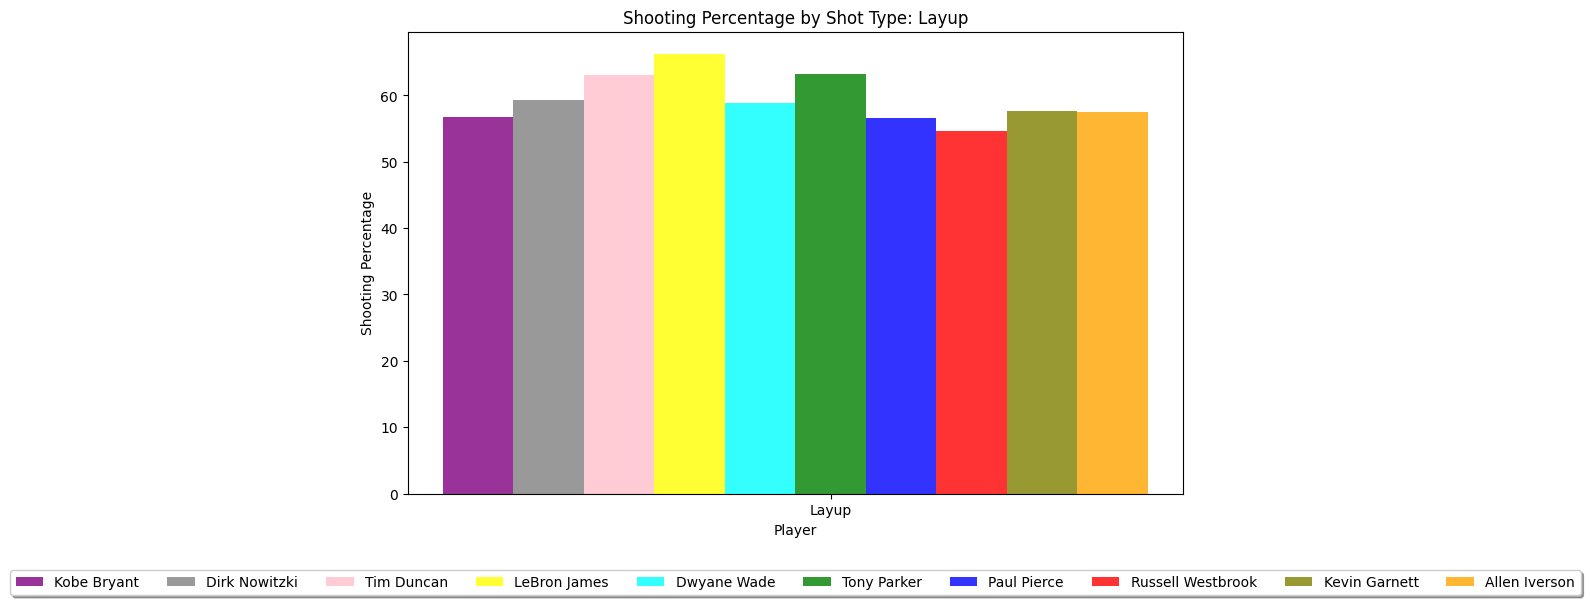

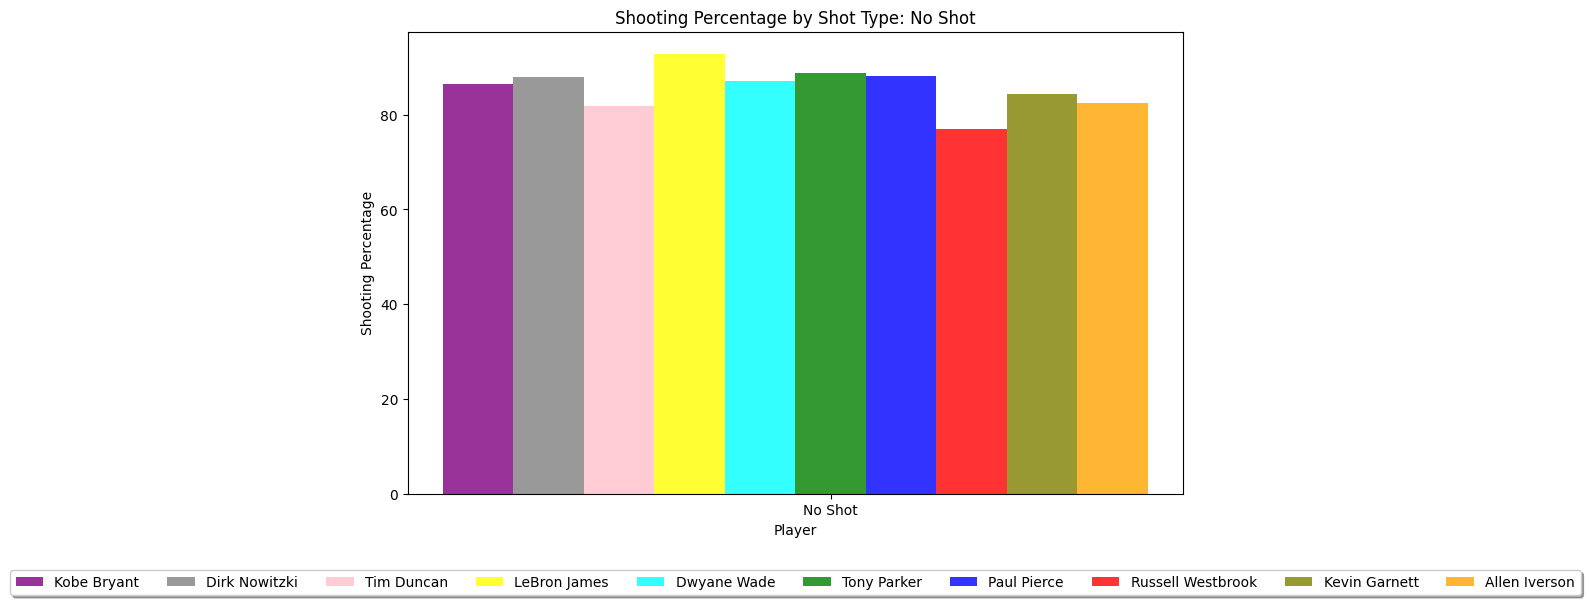

In [148]:
player_team_shots_made = df.groupby(['Player Name', 'Team Name']).agg({'Shot Made Flag': 'sum'}).reset_index()
player_team_shots_made = player_team_shots_made.sort_values(by='Shot Made Flag', ascending=False)
top_players = player_team_shots_made['Player Name'].tolist()[:10]
player_data = df[df['Player Name'].isin(top_players)]

player_summary = player_data.groupby(['Player Name', 'Action Type']).agg({'Shot Distance': 'count', 'Shot Made Flag': 'sum'}).reset_index()
player_summary.columns = ['Player Name', 'Shot Type', 'Shots Attempted', 'Shots Made']
player_summary['Shooting Percentage'] = player_summary['Shots Made'] / player_summary['Shots Attempted'] * 100
player_shot_summary = player_summary.groupby(['Player Name', 'Shot Type']).mean().reset_index()

for shot_type in player_shot_summary['Shot Type'].unique():
    shot_type_data = player_shot_summary[player_shot_summary['Shot Type'] == shot_type]
    pivot_table = shot_type_data.pivot(index='Player Name', columns='Shot Type', values='Shooting Percentage')

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.1
    opacity = 0.8

    colors = ['purple', 'gray','pink','yellow','cyan','green','blue','red','olive','orange']

    for i, player in enumerate(top_players):
        x = np.arange(len(pivot_table.columns))
        y = pivot_table.loc[player].values
        ax.bar(x + (i * bar_width), y, bar_width, alpha=opacity, color=colors[i], label=player)

    ax.set_title(f'Shooting Percentage by Shot Type: {shot_type}')
    ax.set_xlabel('Player')
    ax.set_ylabel('Shooting Percentage')
    ax.set_xticks(x + (len(top_players) / 2) * bar_width)
    ax.set_xticklabels(pivot_table.columns)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(top_players))

    plt.show()


Clutch performance: Analyze shooting performance during clutch moments, such as the last two minutes of a close game or overtime periods. This could help identify which players or teams perform best under pressure.



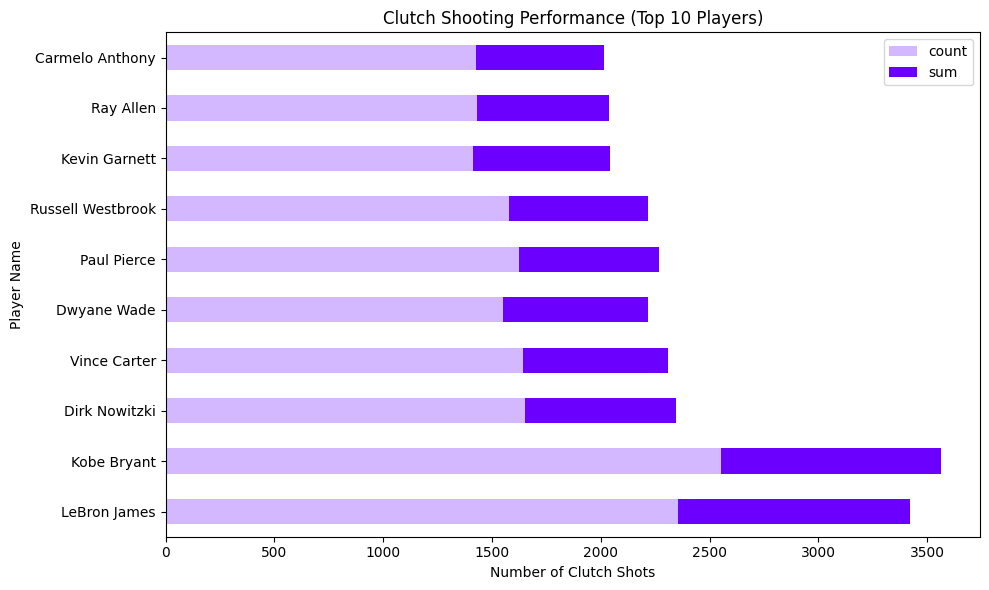

In [149]:
custom_cmap = ListedColormap(['#D3B8FF', '#6B00FF'])

df['Clutch Time'] = ((df['Minutes Remaining'] <= 2) & (df['Period'] >= 4) & (abs(df['Shot Made Flag']) <= 5))
clutch_shots = df[df['Clutch Time'] == True]

player_stats = clutch_shots.groupby(['Player Name'])[['Shot Made Flag']].agg(['count', 'sum'])
player_stats.columns = player_stats.columns.droplevel()

player_stats = player_stats.sort_values(by='sum', ascending=False)

top_players = player_stats.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_players.plot(kind='barh', stacked=True, ax=ax, colormap=custom_cmap)
ax.set_xlabel('Number of Clutch Shots')
ax.set_ylabel('Player Name')
ax.set_title('Clutch Shooting Performance (Top 10 Players)')
plt.tight_layout()
plt.show()

The plot helps us understand the Lebron James and Kobe Bryant have highest number of clutch shots.

Correlation Analysis

<ipython-input-150-779376954148>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


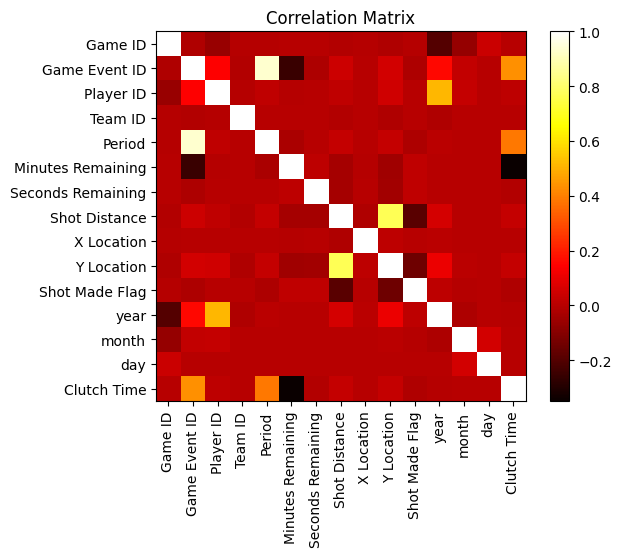

In [150]:
corr_matrix = df.corr()

plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


We can see perfect negative correlation of Shot Distance and Shot Made Flag which tells us that as farthest the shot, the success rate of that shot decreases.

Playoff vs Regular Season shooting efficiency for top 10 players

<ipython-input-154-6757e13e0cbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Playoff Game'] = np.where(player_data['Season Type'] == 'Playoffs', 1, 0)
<ipython-input-154-6757e13e0cbc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Shooting Efficiency'] = player_data.groupby(['Player Name', 'Playoff Game'])['Shot Made Flag'].transform('mean')


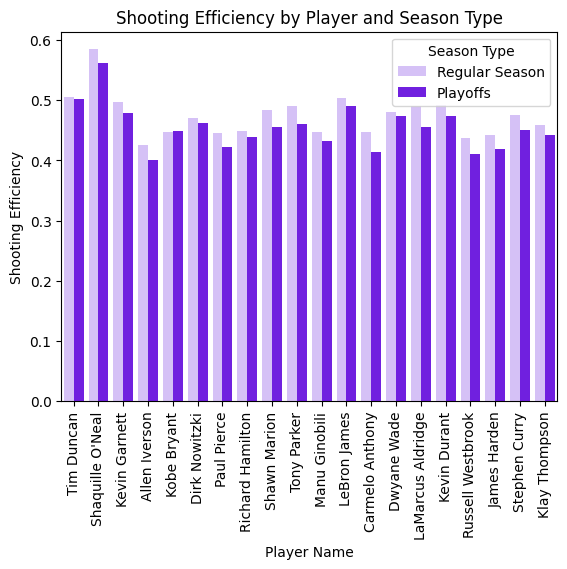

In [154]:
custom_cmap = ['#D3B8FF', '#6B00FF']

top_players = player_team_shots_made['Player Name'].tolist()[:20]
player_data = df[df['Player Name'].isin(top_players)]
player_data['Playoff Game'] = np.where(player_data['Season Type'] == 'Playoffs', 1, 0)
# Calculate shooting efficiency for each player and season type
player_data['Shooting Efficiency'] = player_data.groupby(['Player Name', 'Playoff Game'])['Shot Made Flag'].transform('mean')

# Create a bar chart of shooting efficiency by player and season type
sns.barplot(x='Player Name', y='Shooting Efficiency', hue='Season Type', data=player_data, palette=custom_cmap)
plt.title('Shooting Efficiency by Player and Season Type')
plt.xticks(rotation=90)
plt.show()


We can see from the graph that Kobe Bryant and Tim Duncan has consistent efficiency for both the seasons whereas there is a visible dip for Tony Parker, Shawn Marion and Russel Westbrook.  